In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('anemia.csv')

In [3]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
data.isnull().any()

Gender        False
Hemoglobin    False
MCH           False
MCHC          False
MCV           False
Result        False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
data.shape

(1421, 6)

In [7]:
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [8]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [9]:
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Text(0.5, 1.0, 'Imbalance data analysis')

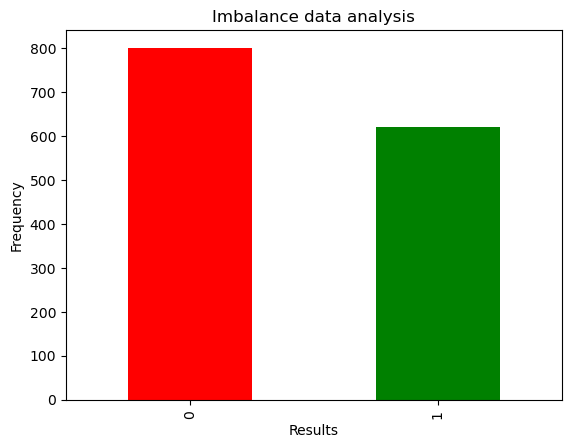

In [10]:
results = data['Result'].value_counts()
results.plot(kind = 'bar',color = ['red','green'])
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.title('Imbalance data analysis')

In [11]:
from sklearn.utils import resample

In [12]:
major = data[data['Result'] == 0]
minor = data[data['Result'] == 1]
undersampling = resample(major,replace = False,n_samples = len(minor),random_state = 47)
data = pd.concat([undersampling,minor])
print(data['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


Text(0.5, 1.0, 'Imbalance data analysis(Balanced)')

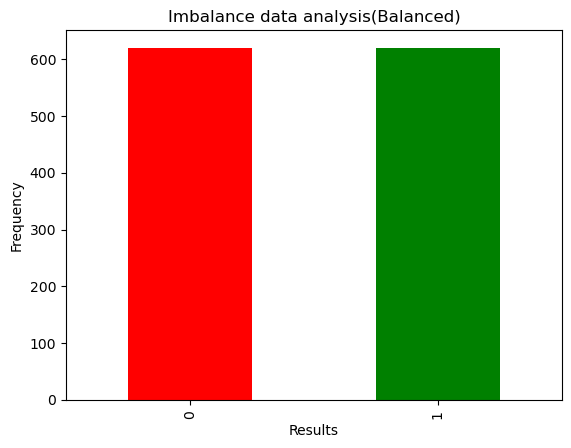

In [13]:
res_balanced = data['Result'].value_counts()
res_balanced.plot(kind = 'bar',color = ['red','green'])
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.title('Imbalance data analysis(Balanced)')

Text(0.5, 1.0, 'Gender analysis')

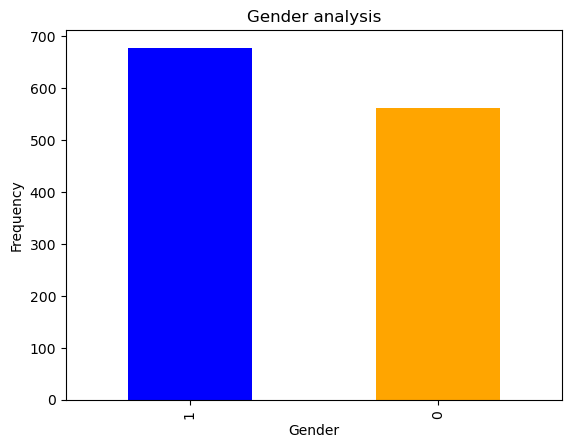

In [14]:
gender = data['Gender'].value_counts()
gender.plot(kind = 'bar',color = ['blue','orange'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender analysis')

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


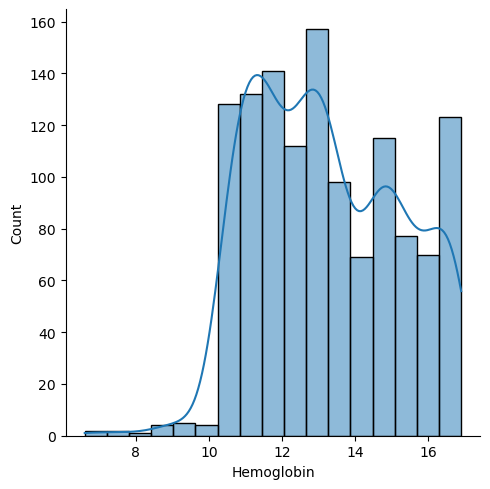

In [15]:
sns.displot(data['Hemoglobin'],kde = True)

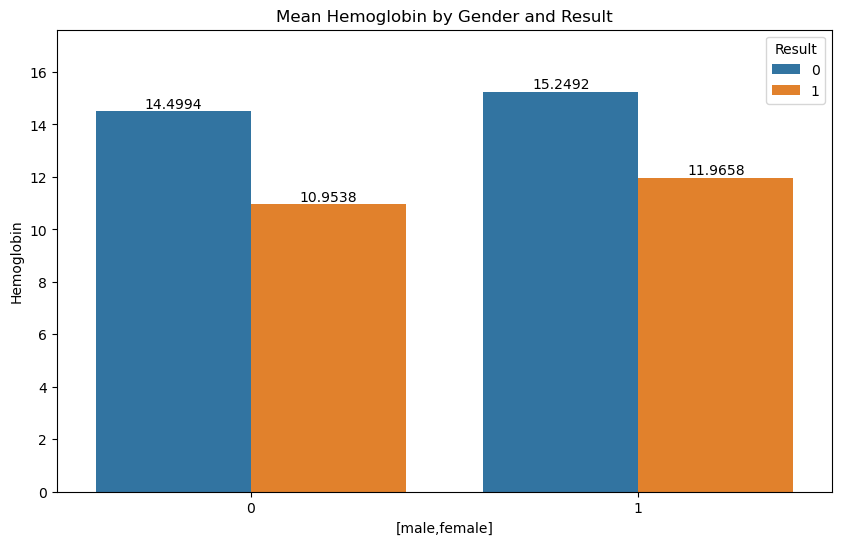

In [16]:
df = pd.DataFrame(data)


df['Result'] = df['Result'].map({0: '0', 1: '1'})


mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().reset_index()


plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Gender', y='Hemoglobin', hue='Result', data=mean_hemoglobin)


plt.title('Mean Hemoglobin by Gender and Result')
plt.xlabel('[male,female]')
plt.ylabel('Hemoglobin')

for i in plot.containers:
    plot.bar_label(i,fmt = '%.4f',label_type = 'edge')

plt.ylim(0,plt.ylim()[1]*1.1)

plt.show()

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

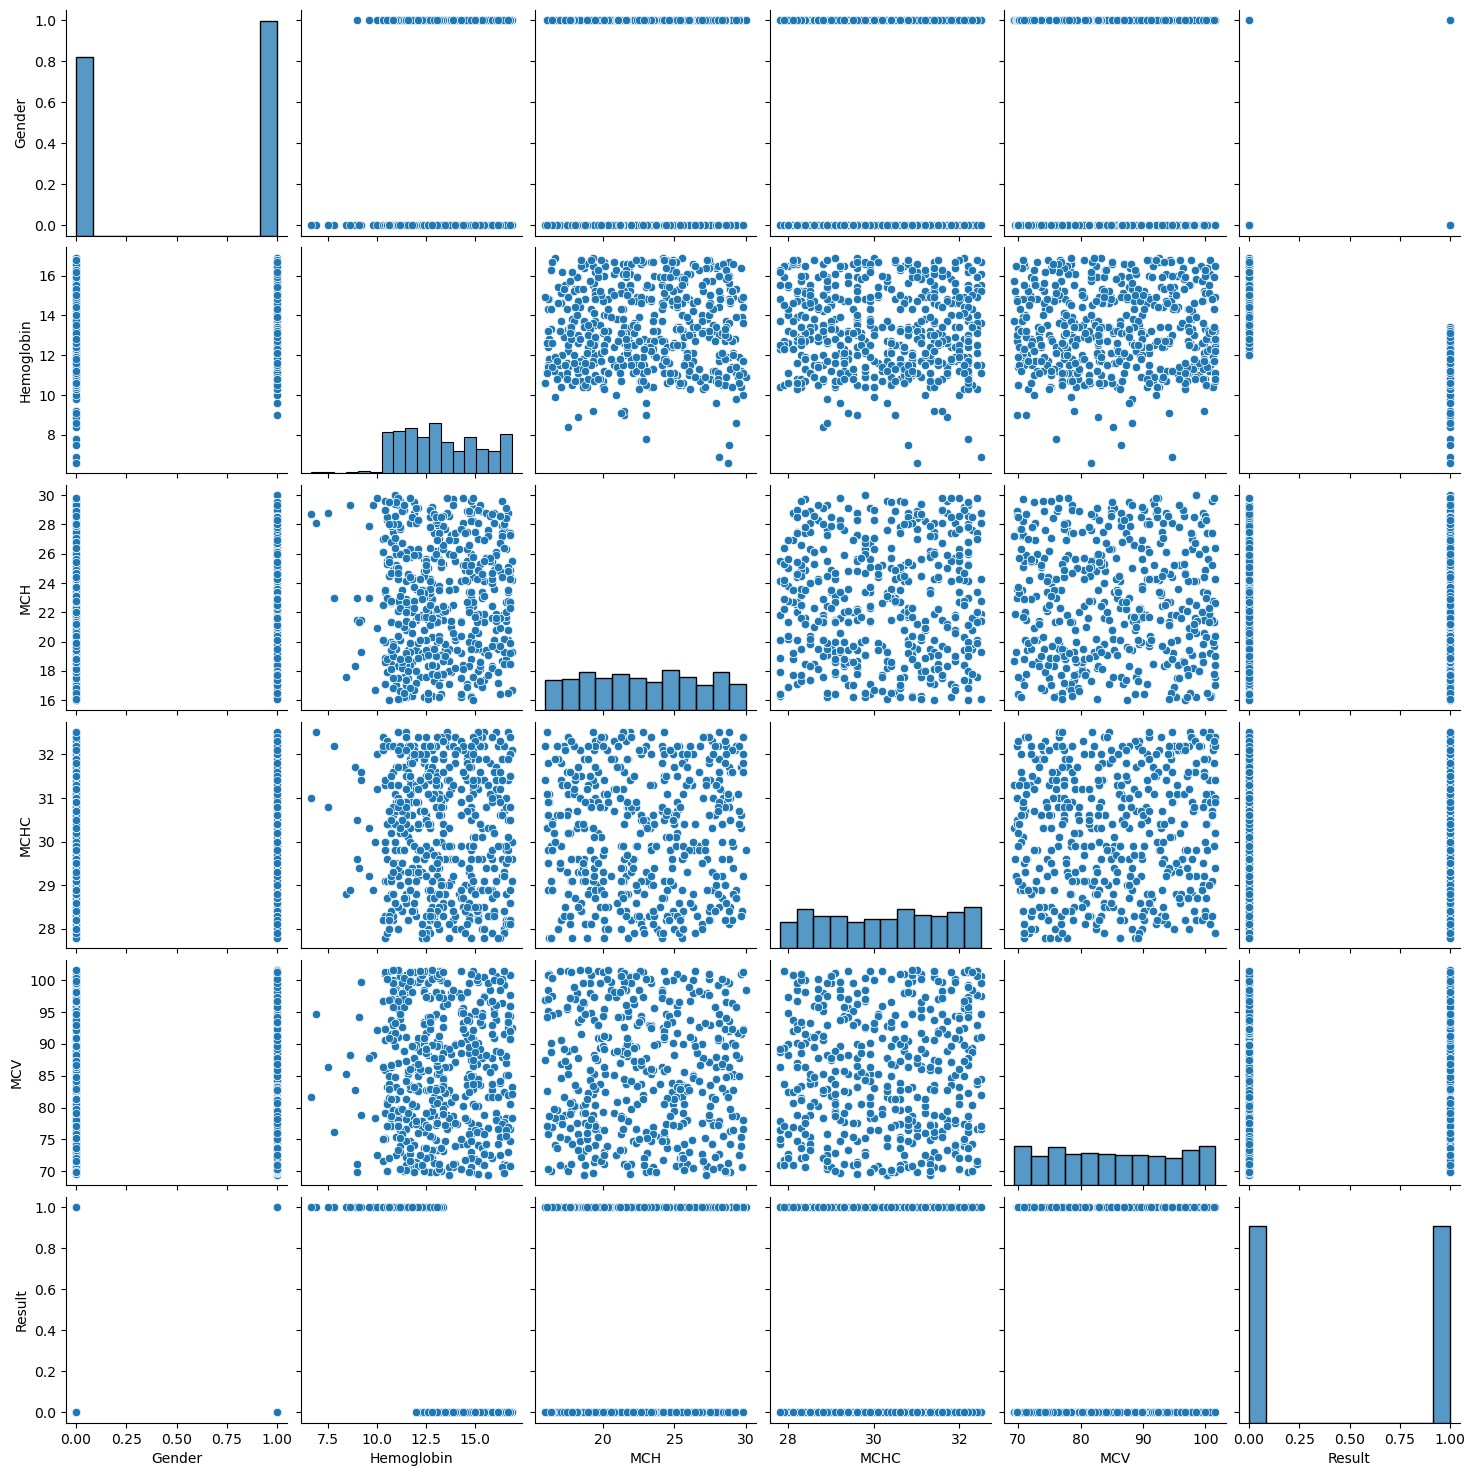

In [17]:
sns.pairplot(data)

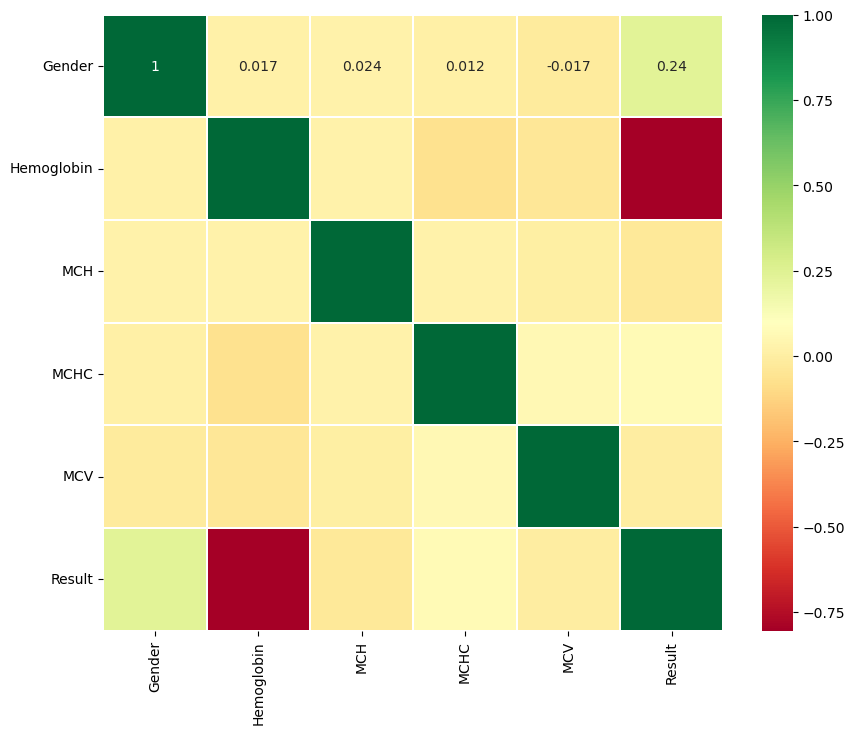

In [18]:
sns.heatmap(data.corr(),annot = True,cmap = 'RdYlGn',linewidths = 0.2)
figure = plt.gcf()
figure.set_size_inches(10,8)
plt.show()

In [19]:
y = data['Result']
x = data.drop('Result',axis = 1)

In [20]:
x.head()

,Gender,Hemoglobin,MCH,MCHC,MCV
312,0,13.2,20.2,28.5,85.2
146,0,15.8,28.6,31.1,96.6
773,0,14.2,26.3,28.8,97.9
636,1,14.0,23.6,28.3,89.8
60,1,16.4,18.7,29.6,96.4


In [21]:
y.head()

312    0
146    0
773    0
636    0
60     0
Name: Result, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 234)

In [24]:
x_train.shape

(992, 5)

In [25]:
x_test.shape

(248, 5)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
log = LogisticRegression()

In [28]:
log.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_predict = log.predict(x_test)

In [30]:
acc_lr = accuracy_score(y_test,y_predict)

In [31]:
acc_lr

0.9879032258064516

In [32]:
rep_lr = classification_report(y_test,y_predict)

In [33]:
print(rep_lr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       123
           1       0.98      1.00      0.99       125

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [35]:
rf = RandomForestClassifier()

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [37]:
rf = RandomizedSearchCV(rf, param_grid, cv=5)

In [38]:
rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [39]:
y_predict = rf.predict(x_test)

In [40]:
acc_rf = accuracy_score(y_test,y_predict)
acc_rf

1.0

In [41]:
print("Best parameters: {}".format(rf.best_params_))
print("Best accuracy on test: {}".format(acc_rf))

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best accuracy on test: 1.0


In [42]:
rep_rf = classification_report(y_test,y_predict)
print(rep_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       125

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [43]:
confusion_matrix(y_test,y_predict)

array([[123,   0],
       [  0, 125]], dtype=int64)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [45]:
dec = DecisionTreeClassifier()

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
dec = RandomizedSearchCV(dec, param_grid, cv=5)

In [48]:
dec.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [49]:
y_predict = dec.predict(x_test)

In [50]:
acc_dc = accuracy_score(y_test,y_predict)
acc_dc

1.0

In [51]:
print("Best parameters: {}".format(dec.best_params_))
print("Best accuracy on test: {}".format(acc_dc))

Best parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'criterion': 'gini'}
Best accuracy on test: 1.0


In [52]:
rep_dc = classification_report(y_test,y_predict)
print(rep_dc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       125

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [53]:
confusion_matrix(y_test,y_predict)

array([[123,   0],
       [  0, 125]], dtype=int64)

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
NB = GaussianNB()

In [56]:
NB.fit(x_train,y_train)

GaussianNB()

In [57]:
y_predict = NB.predict(x_test)

In [58]:
acc_NB = accuracy_score(y_test,y_predict)
acc_NB

0.9516129032258065

In [59]:
rep_NB = classification_report(y_test,y_predict)
print(rep_NB)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.93      0.98      0.95       125

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



In [60]:
from sklearn.svm import SVC

In [61]:
SVM = SVC()

In [62]:
SVM.fit(x_train,y_train)

SVC()

In [63]:
y_predict = SVM.predict(x_test)

In [64]:
acc_svm = accuracy_score(y_test,y_predict)
acc_svm

0.875

In [65]:
rep_svm = classification_report(y_test,y_predict)
print(rep_svm)

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       123
           1       0.81      0.98      0.89       125

    accuracy                           0.88       248
   macro avg       0.89      0.87      0.87       248
weighted avg       0.89      0.88      0.87       248



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [67]:
GB = GradientBoostingClassifier()

In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [69]:
GB = RandomizedSearchCV(GB, param_grid, cv=5)

In [70]:
GB.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]})

In [71]:
y_predict = GB.predict(x_test)

In [72]:
acc_GB = accuracy_score(y_test,y_predict)
acc_GB

1.0

In [73]:
rep_GB = classification_report(y_test,y_predict)
print(rep_GB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       125

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [74]:
confusion_matrix(y_test,y_predict)

array([[123,   0],
       [  0, 125]], dtype=int64)

In [75]:
print("Best parameters: {}".format(GB.best_params_))
print("Best accuracy on test: {}".format(acc_GB))

Best parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}
Best accuracy on test: 1.0


In [76]:
model = pd.DataFrame({'Model' : ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','Gaussian Naive bayes','Support Vector Machine','Gradient Boost Classifier'],'Score' : [acc_lr,acc_rf,acc_dc,acc_NB,acc_svm,acc_GB]})

In [77]:
model

,Model,Score
0,Logistic Regression,0.987903
1,Random Forest Classifier,1.000000
2,Decision Tree Classifier,1.000000
3,Gaussian Naive bayes,0.951613
4,Support Vector Machine,0.875000
5,Gradient Boost Classifier,1.000000


In [78]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(GB,f)

In [79]:
with open('model.pkl','rb') as f:
    model = pickle.load(f)

In [80]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)